In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from importdata import importdata
import MachineLearning as ML

import MLAnalysis

#random forest
from sklearn.ensemble import RandomForestRegressor

# kNN routine from scikit-learn:
from sklearn.neighbors import KNeighborsRegressor

# Cross-Validation routines:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#plt.style.use('default')

%matplotlib inline

In [5]:
#read in the data using our importdata module
cat = importdata()

cat.columns.values

array(['RELEASE', 'OBJID', 'TYPE', 'RA', 'DEC', 'RA_IVAR', 'DEC_IVAR',
       'EBV', 'FLUX_U', 'FLUX_G', 'FLUX_R', 'FLUX_I', 'FLUX_Z', 'FLUX_Y',
       'FLUX_W1', 'FLUX_W2', 'FLUX_W3', 'FLUX_W4', 'FLUX_IVAR_U',
       'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_I', 'FLUX_IVAR_Z',
       'FLUX_IVAR_Y', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'FLUX_IVAR_W3',
       'FLUX_IVAR_W4', 'MW_TRANSMISSION_U', 'MW_TRANSMISSION_G',
       'MW_TRANSMISSION_R', 'MW_TRANSMISSION_I', 'MW_TRANSMISSION_Z',
       'MW_TRANSMISSION_Y', 'MW_TRANSMISSION_W1', 'MW_TRANSMISSION_W2',
       'MW_TRANSMISSION_W3', 'MW_TRANSMISSION_W4', 'NOBS_U', 'NOBS_G',
       'NOBS_R', 'NOBS_I', 'NOBS_Z', 'NOBS_Y', 'NOBS_W1', 'NOBS_W2',
       'NOBS_W3', 'NOBS_W4', 'RCHISQ_U', 'RCHISQ_G', 'RCHISQ_R',
       'RCHISQ_I', 'RCHISQ_Z', 'RCHISQ_Y', 'RCHISQ_W1', 'RCHISQ_W2',
       'RCHISQ_W3', 'RCHISQ_W4', 'FRACFLUX_U', 'FRACFLUX_G', 'FRACFLUX_R',
       'FRACFLUX_I', 'FRACFLUX_Z', 'FRACFLUX_Y', 'FRACFLUX_W1',
       'FRACFLUX_W2', 'FRACFLUX_

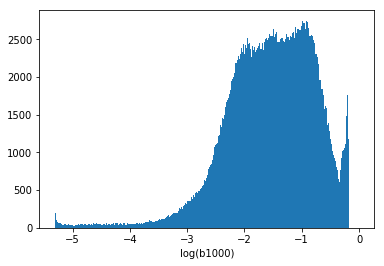

In [6]:
#explore the b1000 and b300 parameters a bit
plt.hist(np.log10(cat.b1000), bins=500)
plt.xlabel('log(b1000)')
plt.show()

In [70]:
#first try fitting with only the colors and a magnitude using a random forest
features = np.column_stack([cat.gminr, cat.rminz, cat.zminw1, cat.w1minw2, cat.gmag])
sfr = np.log10(cat.b1000)
scaler.fit(features)
scaled_features = scaler.transform(features)

regrf = RandomForestRegressor(n_estimators = 50,
                max_depth = 30, max_features = 'auto')

features_train, features_test, sfr_train, sfr_test, scaled_train, scaled_test = train_test_split(
        features, sfr, scaled_features, test_size = 0.20, train_size = 0.80)

regrf.fit(features_train,sfr_train)
sfr_ml = regrf.predict(features_test)
sfr_true = sfr_test

Median Absolute Deviation:  36858.335458334666
Standard Deviation:  29574.6219053285
Outlier Fraction:  0.09586175987251631


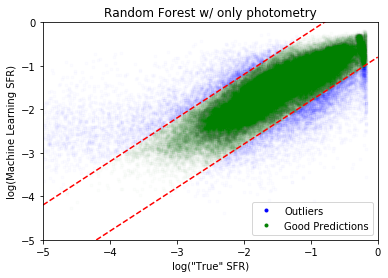

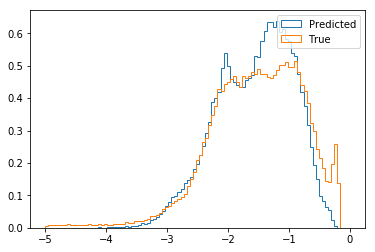

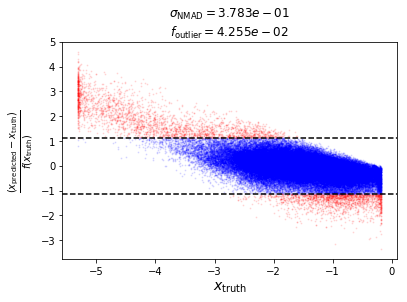

In [88]:
ol_thresh = 0.8
outliers = np.abs(sfr_ml-sfr_true)>ol_thresh

mad = np.sum(np.abs(sfr_ml-sfr_true))
std_dev = np.sum((sfr_ml-sfr_true)**2)

print('Median Absolute Deviation: ', mad)
print('Standard Deviation: ', std_dev)
print('Outlier Fraction: ', np.sum(outliers)/len(outliers))

plt.plot(sfr_true[outliers],sfr_ml[outliers], '.', alpha=0.01, color='blue')
plt.plot(sfr_true[~outliers],sfr_ml[~outliers], '.', alpha=0.01, color='green')
plt.plot(-6,-6, '.', color='blue', label='Outliers')
plt.plot(-6,6, '.', color='green', label='Good Predictions')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)+ol_thresh, '--', color='red')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)-ol_thresh, '--', color='red')
plt.xlim(-5,0)
plt.ylim(-5,0)
plt.title('Random Forest w/ only photometry')
plt.ylabel('log(Machine Learning SFR)')
plt.xlabel('log("True" SFR)')
plt.legend()
plt.show()

plt.hist(sfr_ml, bins=np.linspace(-5,0,100), histtype='step', label='Predicted', density=True)
plt.hist(sfr_true, bins=np.linspace(-5,0,100), histtype='step', label='True', density=True)
plt.legend()
plt.show()

f = lambda x: 1

analysis = MLAnalysis.RegressionAnalyzer(sfr_ml, sfr_true, scale_as=f)

f_label = lambda target: f"f({target})"
analysis.plot_residuals()

In [68]:
#now repeat the same process but also give the radius, axis ratio, and probability of being an exponential profile
#first try fitting with only the colors and a magnitude using a random forest
features = np.column_stack([cat.gminr, cat.rminz, cat.zminw1, cat.w1minw2, cat.gmag,
                            cat.p_exp, cat.axis_ratio, cat.radius])
sfr = np.log10(cat.b1000)
scaler.fit(features)
scaled_features = scaler.transform(features)

regrf = RandomForestRegressor(n_estimators = 50,
                max_depth = 30, max_features = 'auto')

features_train, features_test, sfr_train, sfr_test, scaled_train, scaled_test = train_test_split(
        features, sfr, scaled_features, test_size = 0.20, train_size = 0.80)

regrf.fit(features_train,sfr_train)
sfr_ml = regrf.predict(features_test)
sfr_true = sfr_test

Median Absolute Deviation:  35134.88428251411
Standard Deviation:  27700.530324675827
Outlier Fraction:  0.0887903988845177


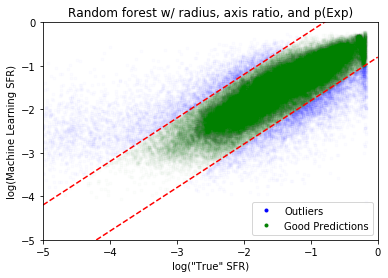

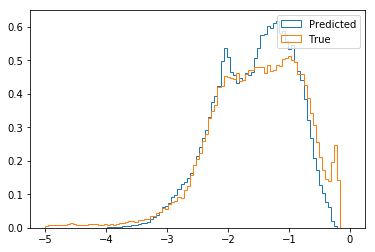

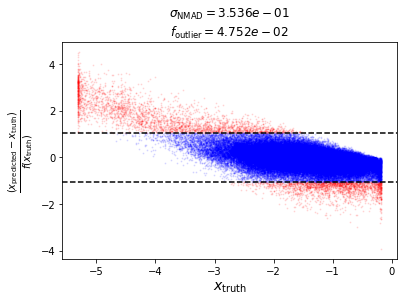

In [69]:
ol_thresh = 0.8
outliers = np.abs(sfr_ml-sfr_true)>ol_thresh

mad = np.sum(np.abs(sfr_ml-sfr_true))
std_dev = np.sum((sfr_ml-sfr_true)**2)

print('Median Absolute Deviation: ', mad)
print('Standard Deviation: ', std_dev)
print('Outlier Fraction: ', np.sum(outliers)/len(outliers))

plt.plot(sfr_true[outliers],sfr_ml[outliers], '.', alpha=0.01, color='blue')
plt.plot(sfr_true[~outliers],sfr_ml[~outliers], '.', alpha=0.01, color='green')
plt.plot(-6,-6, '.', color='blue', label='Outliers')
plt.plot(-6,6, '.', color='green', label='Good Predictions')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)+ol_thresh, '--', color='red')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)-ol_thresh, '--', color='red')
plt.xlim(-5,0)
plt.ylim(-5,0)
plt.title('Random forest w/ radius, axis ratio, and p(Exp)')
plt.ylabel('log(Machine Learning SFR)')
plt.xlabel('log("True" SFR)')
plt.legend()
plt.show()

plt.hist(sfr_ml, bins=np.linspace(-5,0,100), histtype='step', label='Predicted', density=True)
plt.hist(sfr_true, bins=np.linspace(-5,0,100), histtype='step', label='True', density=True)
plt.legend()
plt.show()

f = lambda x: 1

analysis = MLAnalysis.RegressionAnalyzer(sfr_ml, sfr_true, scale_as=f)

f_label = lambda target: f"f({target})"
analysis.plot_residuals()

In [66]:
#test to see if it was just radius or if the other quantities helped 
#now repeat the same process but also give the radius, axis ratio, and probability of being an exponential profile
#first try fitting with only the colors and a magnitude using a random forest
features = np.column_stack([cat.gminr, cat.rminz, cat.zminw1, cat.w1minw2, cat.gmag,
                            cat.radius])
sfr = np.log10(cat.b1000)
scaler.fit(features)
scaled_features = scaler.transform(features)

regrf = RandomForestRegressor(n_estimators = 50,
                max_depth = 30, max_features = 'auto')

features_train, features_test, sfr_train, sfr_test, scaled_train, scaled_test = train_test_split(
        features, sfr, scaled_features, test_size = 0.20, train_size = 0.80)

regrf.fit(features_train,sfr_train)
sfr_ml = regrf.predict(features_test)
sfr_true = sfr_test

Median Absolute Deviation:  35310.51791776045
Standard Deviation:  27642.369130764568
Outlier Fraction:  0.08886011652806135


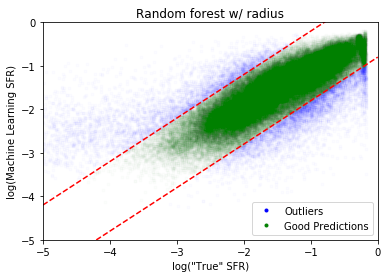

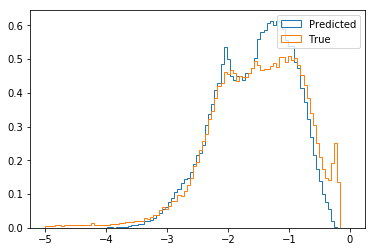

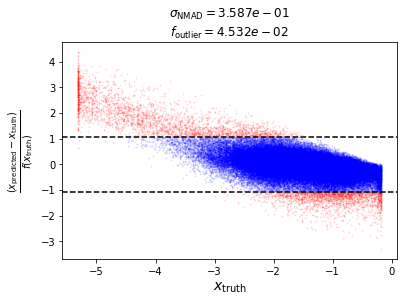

In [67]:
ol_thresh = 0.8
outliers = np.abs(sfr_ml-sfr_true)>ol_thresh

mad = np.sum(np.abs(sfr_ml-sfr_true))
std_dev = np.sum((sfr_ml-sfr_true)**2)

print('Median Absolute Deviation: ', mad)
print('Standard Deviation: ', std_dev)
print('Outlier Fraction: ', np.sum(outliers)/len(outliers))

plt.plot(sfr_true[outliers],sfr_ml[outliers], '.', alpha=0.01, color='blue')
plt.plot(sfr_true[~outliers],sfr_ml[~outliers], '.', alpha=0.01, color='green')
plt.plot(-6,-6, '.', color='blue', label='Outliers')
plt.plot(-6,6, '.', color='green', label='Good Predictions')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)+ol_thresh, '--', color='red')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)-ol_thresh, '--', color='red')
plt.xlim(-5,0)
plt.ylim(-5,0)
plt.title('Random forest w/ radius')
plt.ylabel('log(Machine Learning SFR)')
plt.xlabel('log("True" SFR)')
plt.legend()
plt.show()

plt.hist(sfr_ml, bins=np.linspace(-5,0,100), histtype='step', label='Predicted', density=True)
plt.hist(sfr_true, bins=np.linspace(-5,0,100), histtype='step', label='True', density=True)
plt.legend()
plt.show()

f = lambda x: 1

analysis = MLAnalysis.RegressionAnalyzer(sfr_ml, sfr_true, scale_as=f)

f_label = lambda target: f"f({target})"
analysis.plot_residuals()

In [49]:
#try instead training a k-nearest neighbors 
regknn = KNeighborsRegressor(n_neighbors = 10, weights='distance')
features = np.column_stack([cat.gminr, cat.rminz, cat.zminw1, cat.w1minw2, cat.gmag, cat.radius])
sfr = np.log10(cat.b1000)
scaler.fit(features)
scaled_features = scaler.transform(features)

features_train, features_test, sfr_train, sfr_test, scaled_train, scaled_test = train_test_split(
        features, sfr, scaled_features, test_size = 0.20, train_size = 0.80)

regknn.fit(scaled_train,sfr_train)
sfr_ml = regknn.predict(scaled_test)
sfr_true = sfr_test

Median Absolute Deviation:  36593.41559655263
Standard Deviation:  29054.649276734774
Outlier Fraction:  0.0967382102484936


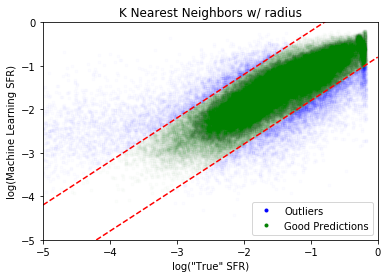

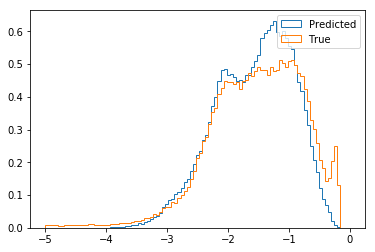

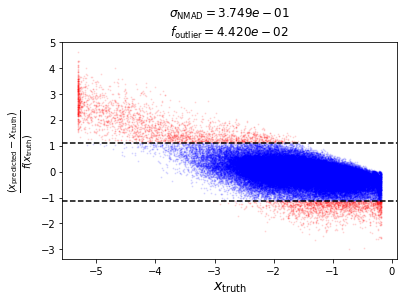

In [61]:
ol_thresh = 0.8
outliers = np.abs(sfr_ml-sfr_true)>ol_thresh

mad = np.sum(np.abs(sfr_ml-sfr_true))
std_dev = np.sum((sfr_ml-sfr_true)**2)

print('Median Absolute Deviation: ', mad)
print('Standard Deviation: ', std_dev)
print('Outlier Fraction: ', np.sum(outliers)/len(outliers))

plt.plot(sfr_true[outliers],sfr_ml[outliers], '.', alpha=0.01, color='blue')
plt.plot(sfr_true[~outliers],sfr_ml[~outliers], '.', alpha=0.01, color='green')
plt.plot(-6,-6, '.', color='blue', label='Outliers')
plt.plot(-6,6, '.', color='green', label='Good Predictions')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)+ol_thresh, '--', color='red')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)-ol_thresh, '--', color='red')
plt.xlim(-5,0)
plt.ylim(-5,0)
plt.title('K Nearest Neighbors w/ radius')
plt.ylabel('log(Machine Learning SFR)')
plt.xlabel('log("True" SFR)')
plt.legend()
plt.show()

plt.hist(sfr_ml, bins=np.linspace(-5,0,100), histtype='step', label='Predicted', density=True)
plt.hist(sfr_true, bins=np.linspace(-5,0,100), histtype='step', label='True', density=True)
plt.legend()
plt.show()

f = lambda x: 1

analysis = MLAnalysis.RegressionAnalyzer(sfr_ml, sfr_true, scale_as=f)

f_label = lambda target: f"f({target})"
analysis.plot_residuals()

In [62]:
#try training with an SGD regressor, which is apparently best suited for this
regsgd = SGDRegressor()

features = np.column_stack([cat.gminr, cat.rminz, cat.zminw1, cat.w1minw2, cat.gmag, cat.radius])
#features = np.column_stack([cat.gminr, cat.rminz, cat.zminw1, cat.w1minw2, cat.gmag])
sfr = np.log10(cat.b1000)
scaler.fit(features)
scaled_features = scaler.transform(features)

features_train, features_test, sfr_train, sfr_test, scaled_train, scaled_test = train_test_split(
        features, sfr, scaled_features, test_size = 0.20, train_size = 0.80)

regsgd.fit(scaled_train,sfr_train)
sfr_ml = regsgd.predict(scaled_test)
sfr_true = sfr_test

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Median Absolute Deviation:  47479.42456337585
Standard Deviation:  43340.748490642174
Outlier Fraction:  0.15263184104377273


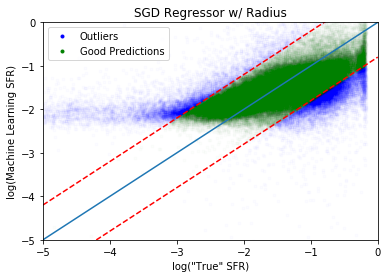

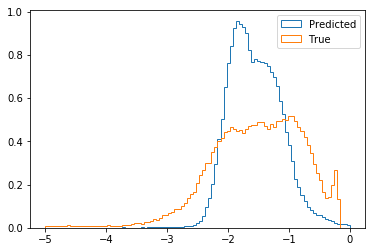

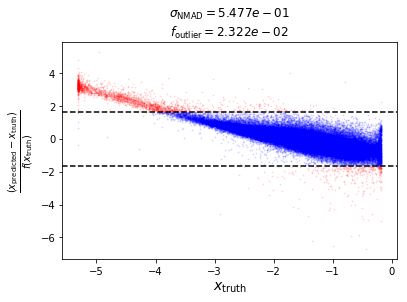

In [65]:
ol_thresh = 0.8
outliers = np.abs(sfr_ml-sfr_true)>ol_thresh

mad = np.sum(np.abs(sfr_ml-sfr_true))
std_dev = np.sum((sfr_ml-sfr_true)**2)

print('Median Absolute Deviation: ', mad)
print('Standard Deviation: ', std_dev)
print('Outlier Fraction: ', np.sum(outliers)/len(outliers))

plt.plot(sfr_true[outliers],sfr_ml[outliers], '.', alpha=0.01, color='blue')
plt.plot(sfr_true[~outliers],sfr_ml[~outliers], '.', alpha=0.01, color='green')
plt.plot(-6,-6, '.', color='blue', label='Outliers')
plt.plot(-6,6, '.', color='green', label='Good Predictions')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100))
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)+ol_thresh, '--', color='red')
plt.plot(np.linspace(-5,0,100), np.linspace(-5,0,100)-ol_thresh, '--', color='red')
plt.xlim(-5,0)
plt.ylim(-5,0)
plt.title('SGD Regressor w/ Radius')
plt.ylabel('log(Machine Learning SFR)')
plt.xlabel('log("True" SFR)')
plt.legend()
plt.show()

plt.hist(sfr_ml, bins=np.linspace(-5,0,100), histtype='step', label='Predicted', density=True)
plt.hist(sfr_true, bins=np.linspace(-5,0,100), histtype='step', label='True', density=True)
plt.legend()
plt.show()

f = lambda x: 1

analysis = MLAnalysis.RegressionAnalyzer(sfr_ml, sfr_true, scale_as=f)

f_label = lambda target: f"f({target})"
analysis.plot_residuals()

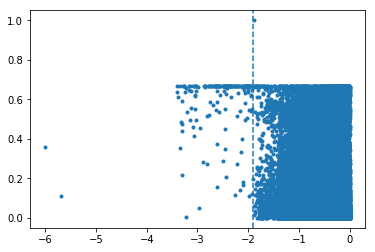

In [86]:
plt.plot(np.log10(cat.redshift), cat.b1000,'.')
plt.axvline(-1.9,ls='--')
plt.show()